## Revisando as possiveis Tabelas

In [1]:
# abrir bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
%matplotlib inline

## Base Final

In [2]:
final = pd.read_csv('C:/Users/afilg/OneDrive/DATA SCIENCE/Aulas - Originais/Projeto_Integrador/final.csv')

In [3]:
final = final.drop(['Unnamed: 0'], axis = 1)

In [4]:
final.head(2).T

,0,1
tconst,tt0118589,tt0120681
primaryTitle,Glitter,From Hell
startYear,2001,2001
runtimeMinutes,104,122
genre_1,Drama,Horror
...,...,...
writer_1_ratingAverage,NaN,NaN
writer_2_ratingAverage,6.9,NaN
AvgRating,5.8,6.25821
numFilmes,0.25,1


In [5]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 66 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tconst                                1490 non-null   object 
 1   primaryTitle                          1490 non-null   object 
 2   startYear                             1490 non-null   int64  
 3   runtimeMinutes                        1490 non-null   int64  
 4   genre_1                               1490 non-null   object 
 5   genre_2                               1373 non-null   object 
 6   genre_3                               997 non-null    object 
 7   Item                                  1490 non-null   int64  
 8   Mês                                   1490 non-null   object 
 9   month                                 1490 non-null   float64
 10  day                                   1490 non-null   float64
 11  year             

In [6]:
final = final.drop(['rating','primaryTitle','Mês','Item','Data Portugues','on_streaming_date','Negative','Positive','All','movieyear','directors_1','directors_2','writers_1','writers_2','rating_num','tomatometer_rating','tomatometer_count','audience_want_to_see_count','audience_rating','audience_count','audience_top_critics_count','audience_fresh_critics_count','audience_rotten_critics_count','audience_fresh_top_critics_count','audience_rotten_rotten_critics_count','tomatometer_avg_rating','audience_top_critics_avg_rating','score_sentiment','startYear'], axis = 1)                           

In [7]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tconst                     1490 non-null   object 
 1   runtimeMinutes             1490 non-null   int64  
 2   genre_1                    1490 non-null   object 
 3   genre_2                    1373 non-null   object 
 4   genre_3                    997 non-null    object 
 5   month                      1490 non-null   float64
 6   day                        1490 non-null   float64
 7   year                       1490 non-null   int64  
 8   FW                         1490 non-null   int64  
 9   Worldwide_Gross            1490 non-null   float64
 10  Production_Budget          1490 non-null   float64
 11  rentability                1490 non-null   float64
 12  log_rentability            1490 non-null   float64
 13  movie_info                 1490 non-null   objec

## Analise da Target

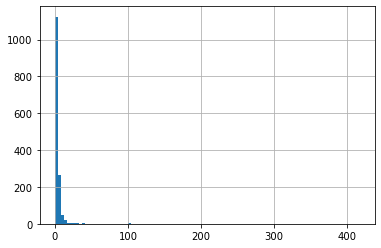

In [8]:
final['rentability'].hist(bins = 100)

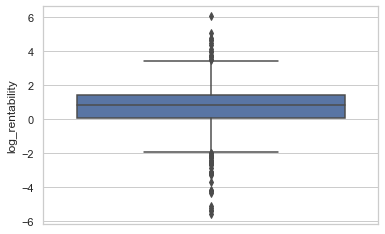

In [9]:
sns.set(style="whitegrid")
tips = final
ax = sns.boxplot(y='log_rentability',data = tips)

In [10]:
final = final[(final.log_rentability > -4)&(final.log_rentability < 4)]

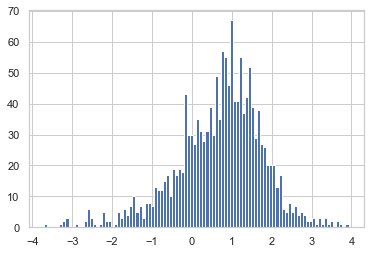

In [11]:
final['log_rentability'].hist(bins = 100)

## Dummização

### Geneross

In [12]:
Genero1 = pd.get_dummies(final['genre_1'])

In [13]:
Genero1.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Musical,Mystery,Sci-Fi,Thriller
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [14]:
Genero2 = pd.get_dummies(final['genre_2'])

In [15]:
Genero2.head()

,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
Genero3 = pd.get_dummies(final['genre_3'])

In [17]:
Genero3.head()

,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
Generos = Genero1.join(Genero2, rsuffix = "_2")
Generos = Generos.join(Genero3, rsuffix = "_3")

In [19]:
Generos['Adventure_Geral']=Generos['Adventure']+Generos['Adventure_2']
Generos['Animation_Geral']=Generos['Animation']+Generos['Animation_2']+Generos['Animation_3']
Generos['Biography_Geral']=Generos['Biography']+Generos['Biography_2']+Generos['Biography_3']
Generos['Comedy_Geral']=Generos['Comedy']+Generos['Comedy_2']+Generos['Comedy_3']
Generos['Crime_Geral']=Generos['Crime']+Generos['Crime_2']+Generos['Crime_3']
Generos['Documentary_Geral']=Generos['Documentary']+Generos['Documentary_2']
Generos['Drama_Geral']=Generos['Drama']+Generos['Drama_2']+Generos['Drama_3']
Generos['Family_Geral']=Generos['Family']+Generos['Family_3']
Generos['Fantasy_Geral']=Generos['Fantasy']+Generos['Fantasy_2']+Generos['Fantasy_3']
Generos['History_Geral']=Generos['History']+Generos['History_3']
Generos['Horror_Geral']=Generos['Horror']+Generos['Horror_2']+Generos['Horror_3']
Generos['Music_Geral']=Generos['Music']+Generos['Music_3']
Generos['Musical_Geral']=Generos['Musical']+Generos['Musical_2']+Generos['Musical_3']
Generos['Mystery_Geral']=Generos['Mystery']+Generos['Mystery_2']+Generos['Mystery_3']
Generos['Romance_Geral']=Generos['Romance']+Generos['Romance_3']
Generos['Sci-Fi_Geral']=Generos['Sci-Fi']+Generos['Sci-Fi_2']+Generos['Sci-Fi_3']
Generos['Sport_Geral']=Generos['Sport']+Generos['Sport_3']
Generos['Thriller_Geral']=Generos['Thriller']+Generos['Thriller_2']+Generos['Thriller_3']
Generos['War_Geral']=Generos['War']+Generos['War_3']
Generos['Western_Geral']=Generos['Western']+Generos['Western_3']

In [20]:
Generos = Generos.drop(['Action','Adventure','Adventure_2','Animation','Animation_2','Animation_3','Biography','Biography_2','Biography_3','Comedy','Comedy_2','Comedy_3','Crime','Crime_2','Crime_3','Documentary','Documentary_2','Drama','Drama_2','Drama_3','Family','Family_3','Fantasy','Fantasy_2','Fantasy_3','History','History_3','Horror','Horror_2','Horror_3','Music','Music_3','Musical','Musical_2','Musical_3','Mystery','Mystery_2','Mystery_3','Romance','Romance_3','Sci-Fi','Sci-Fi_2','Sci-Fi_3','Sport','Sport_3','Thriller','Thriller_2','Thriller_3','War','War_3','Western','Western_3'],axis = 1)

In [21]:
Generos

,Adventure_Geral,Animation_Geral,Biography_Geral,Comedy_Geral,Crime_Geral,Documentary_Geral,Drama_Geral,Family_Geral,Fantasy_Geral,History_Geral,Horror_Geral,Music_Geral,Musical_Geral,Mystery_Geral,Romance_Geral,Sci-Fi_Geral,Sport_Geral,Thriller_Geral,War_Geral,Western_Geral
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1486,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1487,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1488,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0


In [22]:
final_generos = final.join(Generos)

In [23]:
final_generos = final_generos.drop(['genre_1','genre_2','genre_3'], axis = 1)

### Estudios

In [24]:
temp = pd.pivot_table(final_generos, values='tconst', index='studio_name', aggfunc='count')
temp

,tconst
studio_name,
20th Century Fox,122
20th Century Fox Distribution,1
20th Century Fox/Regency Films,1
A24,5
A24 Films,2
...,...
Working Title Films,1
Yari Film Group,1
Yari Film Group Releasing,1


In [25]:
studios = pd.read_csv('C:/Users/afilg/OneDrive/DATA SCIENCE/Aulas - Originais/Projeto_Integrador/test_2.csv')

In [26]:
studios.head()

,studio_name,new_studio
0,20th Century Fox,Big_Studio
1,20th Century Fox Distribution,Big_Studio
2,20th Century Fox/Regency Films,Big_Studio
3,Blue Sky Studio/20th Century Fox,Big_Studio
4,Fox Atomic,Big_Studio


In [27]:
final_generos = final_generos.join(studios.set_index('studio_name'), on = 'studio_name')

In [28]:
final_generos = final_generos.drop(['studio_name'], axis = 1)

In [29]:
studios = pd.get_dummies(final_generos['new_studio'])

In [30]:
final_generos_studios = final_generos.join(studios)

In [31]:
final_generos_studios = final_generos_studios.drop(['new_studio'], axis = 1)

In [32]:
final_generos_studios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1489
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tconst                     1472 non-null   object 
 1   runtimeMinutes             1472 non-null   int64  
 2   month                      1472 non-null   float64
 3   day                        1472 non-null   float64
 4   year                       1472 non-null   int64  
 5   FW                         1472 non-null   int64  
 6   Worldwide_Gross            1472 non-null   float64
 7   Production_Budget          1472 non-null   float64
 8   rentability                1472 non-null   float64
 9   log_rentability            1472 non-null   float64
 10  movie_info                 1472 non-null   object 
 11  tomatometer_status         1472 non-null   object 
 12  audience_status            1472 non-null   object 
 13  audience_avg_rating        1472 non-null   float

### Tomatometros

In [33]:
tomatometro = pd.get_dummies(final_generos_studios['tomatometer_status'])

In [34]:
audiencia_rt = pd.get_dummies(final_generos_studios['audience_status'])

In [35]:
rt_dummies = tomatometro.join(audiencia_rt)

In [36]:
rt_dummies.head()

,certified_fresh,fresh,rotten,spilled,upright
0,0,0,1,1,0
1,0,0,1,0,1
2,1,0,0,0,1
3,0,0,1,1,0
4,0,1,0,0,1


In [37]:
final_generos_studios_rt = final_generos_studios.join(rt_dummies)

In [38]:
final_generos_studios_rt = final_generos_studios_rt.drop(['tomatometer_status','audience_status'], axis = 1)

### Visualização Final

In [39]:
final_generos_studios_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1489
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tconst                     1472 non-null   object 
 1   runtimeMinutes             1472 non-null   int64  
 2   month                      1472 non-null   float64
 3   day                        1472 non-null   float64
 4   year                       1472 non-null   int64  
 5   FW                         1472 non-null   int64  
 6   Worldwide_Gross            1472 non-null   float64
 7   Production_Budget          1472 non-null   float64
 8   rentability                1472 non-null   float64
 9   log_rentability            1472 non-null   float64
 10  movie_info                 1472 non-null   object 
 11  audience_avg_rating        1472 non-null   float64
 12  negative_perc              1472 non-null   float64
 13  positive_perc              1472 non-null   float

In [40]:
final_generos_studios_rt.head().T

,0,1,2,3,4
tconst,tt0118589,tt0120681,tt0120737,tt0120755,tt0122459
runtimeMinutes,104,122,178,123,115
month,9,10,12,5,4
day,21,19,19,24,7
year,2001,2001,2001,2000,2000
FW,38,42,51,21,14
Worldwide_Gross,4.27337e+06,6.87124e+07,8.87211e+08,5.49589e+08,3.26623e+07
Production_Budget,8.5e+06,3.5e+07,1.09e+08,1.2e+08,2.4e+07
rentability,0.50275,1.96321,8.13955,4.5799,1.36093
log_rentability,-0.687663,0.674581,2.09673,1.52168,0.308168


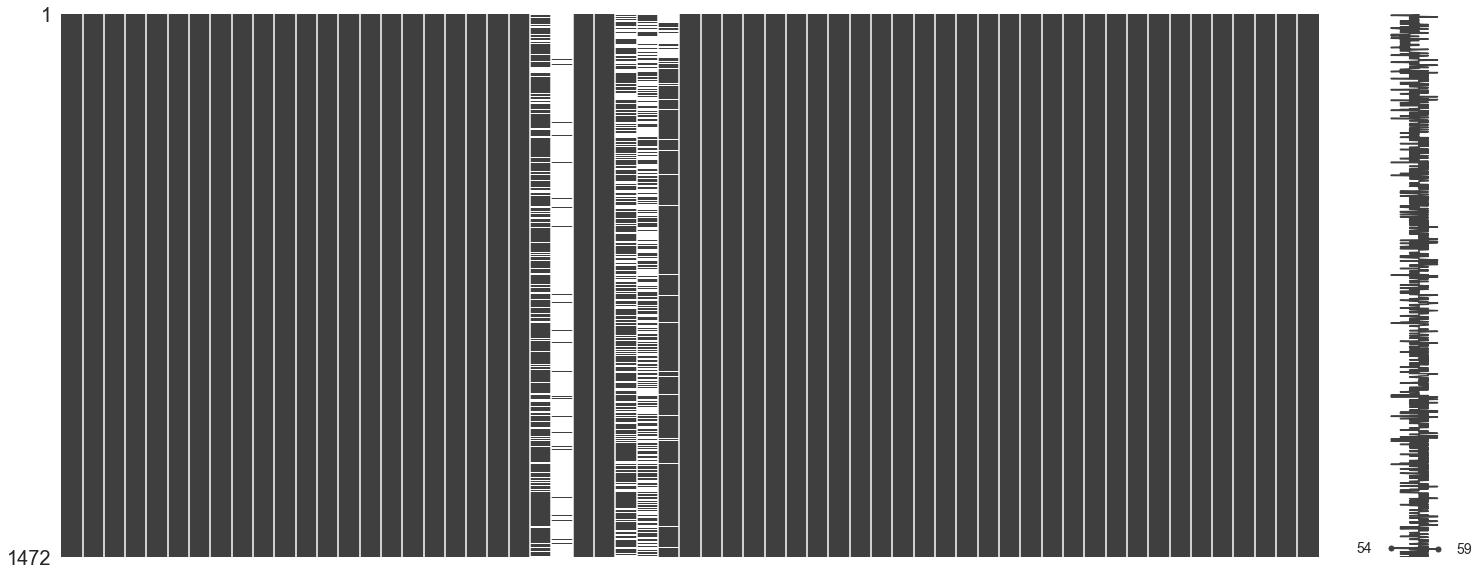

In [41]:
import missingno as msno
msno.matrix(final_generos_studios_rt)

In [42]:
final_generos_studios_rt = final_generos_studios_rt.fillna(0)

## Correlação

In [43]:
abs(final_generos_studios_rt.corr()['log_rentability']).sort_values(ascending = False).head(10)

log_rentability        1.000000
rentability            0.726308
Worldwide_Gross        0.401620
numVotes               0.359109
audience_avg_rating    0.295503
averageRating          0.246775
certified_fresh        0.235275
rotten                 0.219817
upright                0.209606
spilled                0.209606
Name: log_rentability, dtype: float64

## 1a Regressao

In [44]:
from sklearn.preprocessing import MinMaxScaler

columns = final_generos_studios_rt.drop(['tconst', 'month','Worldwide_Gross','Production_Budget', 'day', 'year', 'log_rentability','rentability','movie_info','numVotes'], axis=1)

X= columns.values

scaler = MinMaxScaler()

scaler.fit_transform(X)

array([[0.31952663, 0.71153846, 0.4617737 , ..., 1.        , 1.        ,
        0.        ],
       [0.4260355 , 0.78846154, 0.65749235, ..., 1.        , 0.        ,
        1.        ],
       [0.75739645, 0.96153846, 0.82262997, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.31360947, 0.92307692, 0.65443425, ..., 0.        , 0.        ,
        1.        ],
       [0.4556213 , 0.40384615, 0.62996942, ..., 0.        , 0.        ,
        1.        ],
       [0.43195266, 0.92307692, 0.84097859, ..., 0.        , 0.        ,
        1.        ]])

In [45]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [46]:
# variável target
y = final_generos_studios_rt['log_rentability']
# dividindo oa dados em treino e teste

In [47]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [48]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

In [49]:
regr.score(x_train,y_train)

0.27842929493904833

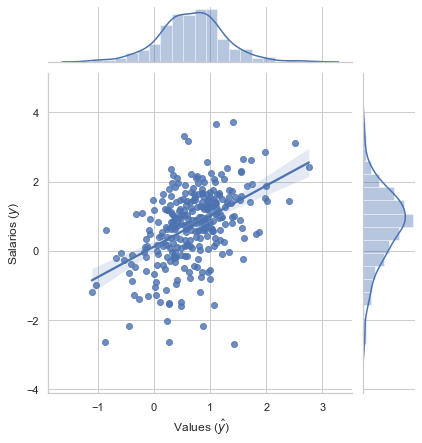

In [50]:
# Plotando a dispersão dos valores preditos pelos valores reais
sns.jointplot(x = y_pred, y=y_test, kind='reg')
plt.xlabel(' Values ($\hat y$)')
plt.ylabel('Salarios ($y$)');

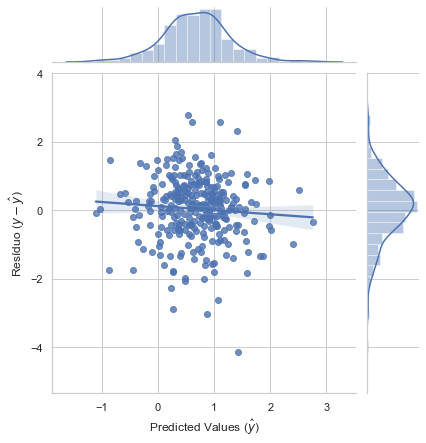

In [51]:
#Homocedasticidade
sns.jointplot(x= y_pred, y=(y_test - y_pred), kind='reg')
plt.xlabel('Predicted Values ($\hat y$)')
plt.ylabel('Resíduo ($y - \hat y$)');

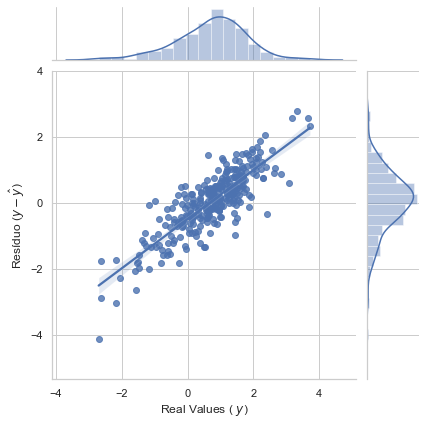

In [52]:
#Endogeneidade
sns.jointplot(x=y_test, y=(y_test - y_pred), kind='reg')
plt.xlabel('Real Values ($\ y$)')
plt.ylabel('Resíduo ($y - \hat y$)');

In [53]:
#Metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = (np.sum(np.abs((y_test - y_pred)/y_test)*100))/len(y_test)
R2 = r2_score(y_test, y_pred)

print(f'MSE Error: {MSE}\nRMSE Error: {rmse}\nMAPE Error: {mape}\nR2: {R2}')

MSE Error: 0.8861721606612404
RMSE Error: 0.9413671763245415
MAPE Error: 140.91917568722948
R2: 0.2198626802012612


In [54]:
y_test[:5]

1152    1.454993
1158    0.989058
1079    0.858217
225    -0.957485
420     1.865385
Name: log_rentability, dtype: float64

In [55]:
y_pred[:5]

array([0.96606445, 0.83972168, 0.3449707 , 0.39074707, 2.00036621])

## Clustering

In [136]:
columns = final_generos_studios_rt.drop(['tconst','month','day','year','Worldwide_Gross','rentability','log_rentability','movie_info'], axis = 1)

In [137]:
X_sample = columns.values 
y_sample = final.loc[:,'log_rentability'].values 

In [138]:
# plotando o silhouette score
# variância ideal é aquela mais perto de 1, por isso queremos o maior silhouette score

from sklearn.metrics import silhouette_score   
from sklearn.cluster import KMeans

sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X_sample)
    sillhoute_scores.append(silhouette_score(X_sample, kmeans.labels_))

([<matplotlib.axis.XTick at 0x1b06cbeabc8>,
 <a list of 31 Text major ticklabel objects>)

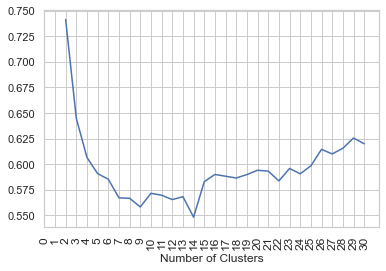

In [139]:
plt.plot(n_cluster_list,sillhoute_scores)
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(0, 31), fontsize=12, rotation=90)

In [140]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)

KMeans()

In [141]:
final_generos_studios_rt['cluster'] = kmeans.labels_

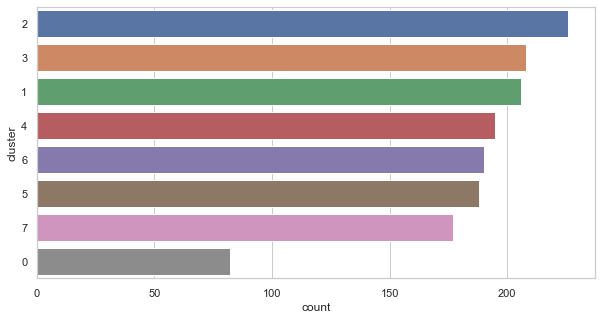

In [143]:
plotcolum(final_generos_studios_rt['cluster'],final_generos_studios_rt)

In [144]:
final_generos_studios_rt.cluster.value_counts()

2    226
3    208
1    206
4    195
6    190
5    188
7    177
0     82
Name: cluster, dtype: int64

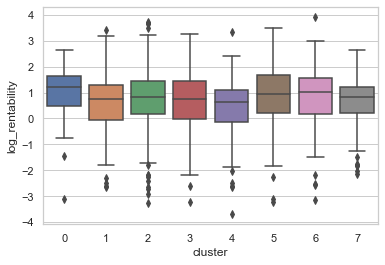

In [145]:
sns.set(style="whitegrid")
tips = final_generos_studios_rt
ax = sns.boxplot(x='cluster', y='log_rentability',data = tips)

In [146]:
Values = ['Adventure_Geral','Animation_Geral','Biography_Geral','Comedy_Geral','Crime_Geral','Documentary_Geral','Drama_Geral','Family_Geral','Fantasy_Geral','History_Geral','Horror_Geral','Music_Geral','Musical_Geral','Mystery_Geral','Romance_Geral','Sci-Fi_Geral','Sport_Geral','Thriller_Geral','War_Geral','Western_Geral']

In [147]:
Generos = pd.DataFrame(pd.pivot_table(final_generos_studios_rt, values=Values, index=['cluster'], aggfunc=np.sum).T)

In [148]:
Generos

cluster,0,1,2,3,4,5,6,7
Adventure_Geral,34,33,56,35,35,27,47,53
Animation_Geral,0,8,38,1,8,24,30,0
Biography_Geral,14,4,5,44,1,28,16,12
Comedy_Geral,4,122,138,52,99,83,92,50
Crime_Geral,14,40,36,41,39,23,31,43
Documentary_Geral,0,0,3,0,1,1,1,0
Drama_Geral,58,46,76,169,35,145,106,83
Family_Geral,2,13,31,12,11,15,23,3
Fantasy_Geral,10,24,22,19,20,9,12,13
History_Geral,10,0,1,11,2,5,7,4


In [122]:
Values = ['Big_Studio','Known_Studio','independent']

In [123]:
Studios = pd.DataFrame(pd.pivot_table(final_generos_studios_rt, values=Values, index=['cluster'], aggfunc=np.sum).T)

In [124]:
Studios

cluster,0,1,2,3,4,5,6,7
Big_Studio,135,136,126,122,129,59,143,97
Known_Studio,45,37,37,30,35,17,45,49
independent,23,35,27,25,30,6,37,42


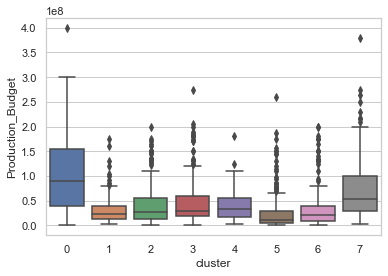

In [149]:
sns.set(style="whitegrid")
tips = final_generos_studios_rt
ax = sns.boxplot(x='cluster', y='Production_Budget',data = tips)

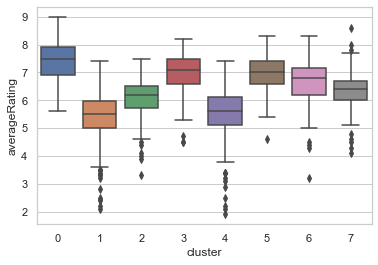

In [150]:
sns.set(style="whitegrid")
tips = final_generos_studios_rt
ax = sns.boxplot(x='cluster', y='averageRating',data = tips)

## Segunda Regressao

In [127]:
columns = final_generos_studios_rt.drop(['tconst', 'month','Worldwide_Gross','Production_Budget', 'day', 'year', 'log_rentability','rentability','movie_info','numVotes'], axis=1)

X= columns.values
# variável target
y = final_generos_studios_rt['log_rentability']
# dividindo oa dados em treino e teste

In [128]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.31952663, 0.71153846, 0.4617737 , ..., 1.        , 0.        ,
        0.57142857],
       [0.4260355 , 0.78846154, 0.65749235, ..., 0.        , 1.        ,
        0.14285714],
       [0.75739645, 0.96153846, 0.82262997, ..., 0.        , 1.        ,
        0.71428571],
       ...,
       [0.31360947, 0.92307692, 0.65443425, ..., 0.        , 1.        ,
        1.        ],
       [0.4556213 , 0.40384615, 0.62996942, ..., 0.        , 1.        ,
        0.14285714],
       [0.43195266, 0.92307692, 0.84097859, ..., 0.        , 1.        ,
        0.14285714]])

In [129]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size =0.2)

In [130]:
regr = linear_model.LinearRegression()

In [131]:
regr.fit(x_train, y_train)

LinearRegression()

In [133]:
y_pred = regr.predict(x_test)

In [134]:
regr.score(x_train,y_train)

0.30247061485353965

In [135]:
#Metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(y_test, y_pred).round(2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
mape = ((np.sum(np.abs((y_test - y_pred)/y_test)*100))/len(y_test)).round(2)
R2 = r2_score(y_test, y_pred).round(2)

print(f'MSE Error: {MSE}\nRMSE Error: {rmse}\nMAPE Error: {mape}\nR2: {R2}')

MSE Error: 1.19
RMSE Error: 1.09
MAPE Error: 183.52
R2: 0.15


## ANN

In [ ]:
import itertools
from keras.optimizers import RMSprop, Adadelta, Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
%matplotlib inline

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50)